# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Change to metric readings
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | weno
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | palikir - national government center
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | progreso
Processing Record 12 of Set 1 | swampscott
Processing Record 13 of Set 1 | ca mau
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ahau
City not found. Skipping...
Processing Record 17 of Set 1 | al jawf
Processing Record 18 of Set 1 | novyy urgal
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | papatowai
Proce

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,15.96,53,31,0.45,AU,1728702351
1,uturoa,-16.7333,-151.4333,25.56,74,4,4.15,PF,1728702352
2,waitangi,-43.9535,-176.5597,10.46,97,100,4.47,NZ,1728702354
3,saint-pierre,-21.3393,55.4781,20.82,56,40,3.60,RE,1728702355
4,albany,42.6001,-73.9662,13.08,75,22,0.45,US,1728702341


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,15.96,53,31,0.45,AU,1728702351
1,uturoa,-16.7333,-151.4333,25.56,74,4,4.15,PF,1728702352
2,waitangi,-43.9535,-176.5597,10.46,97,100,4.47,NZ,1728702354
3,saint-pierre,-21.3393,55.4781,20.82,56,40,3.60,RE,1728702355
4,albany,42.6001,-73.9662,13.08,75,22,0.45,US,1728702341


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

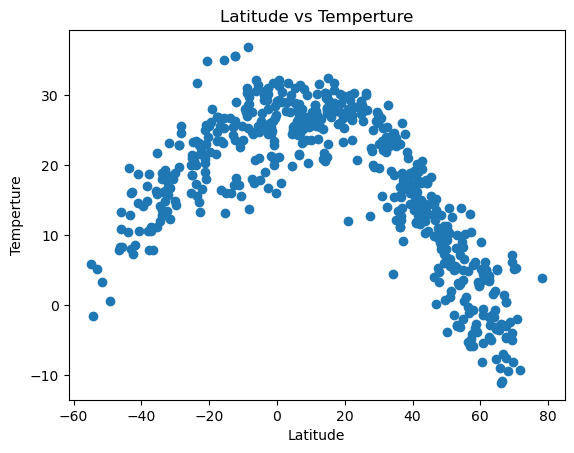

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperture")
plt.title("Latitude vs Temperture")
plt.plot(marker='^', markeredgecolor='red', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

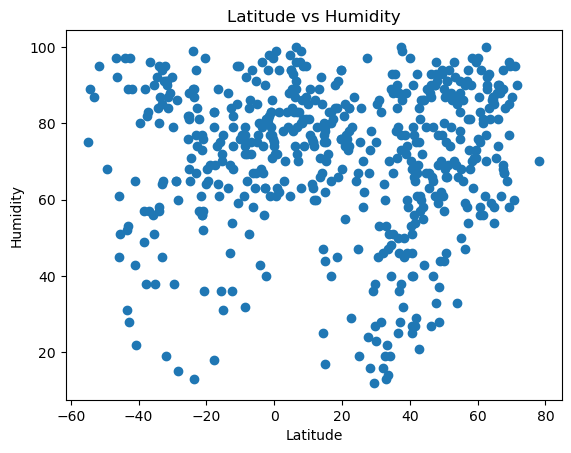

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

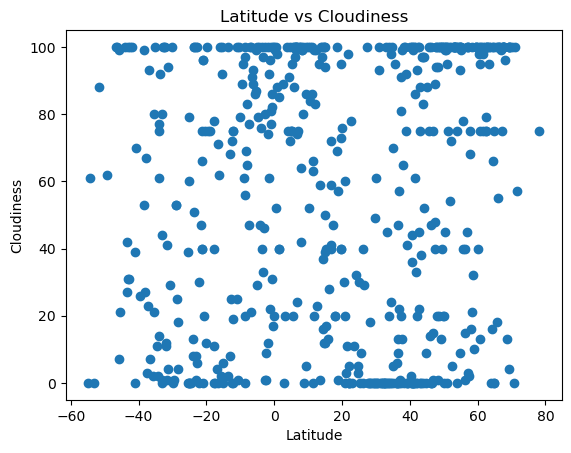

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

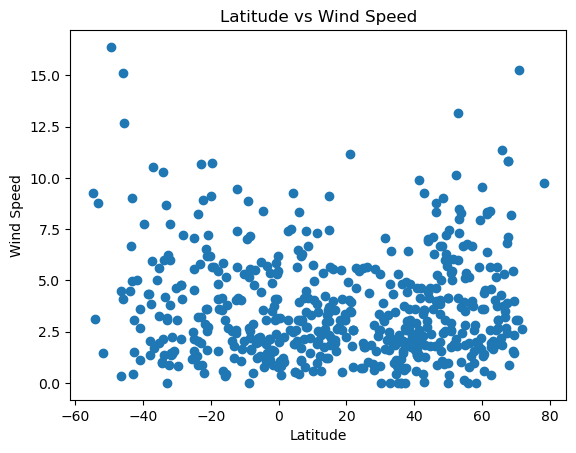

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)


City_ID
0      3.785576
1      3.714720
2      3.788102
3      3.727137
4      3.554765
         ...   
549    3.567731
550    3.749580
551    3.621353
552    3.530719
553    3.780139
Name: Lat, Length: 554, dtype: float64


In [34]:
# Line Equation formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)


y = -0.0x + 3.67


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,albany,42.6001,-73.9662,13.08,75,22,0.45,US,1728702341
6,bandarbeyla,9.4942,50.8122,25.46,87,5,3.30,SO,1728702359
7,porto novo,6.4965,2.6036,24.95,89,100,3.04,BJ,1728702360
10,dame-marie,18.5667,-74.4167,27.52,84,100,2.58,HT,1728702363
12,holualoa,19.6228,-155.9522,23.26,94,95,3.35,US,1728702365


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,15.96,53,31,0.45,AU,1728702351
1,uturoa,-16.7333,-151.4333,25.56,74,4,4.15,PF,1728702352
2,waitangi,-43.9535,-176.5597,10.46,97,100,4.47,NZ,1728702354
3,saint-pierre,-21.3393,55.4781,20.82,56,40,3.60,RE,1728702355
5,ushuaia,-54.8000,-68.3000,5.81,75,0,9.26,AR,1728702133


In [37]:
# A check to ensure all of city_data_df is included in the split dataframes

city_check = len(city_data_df)
northern_check = len(northern_hemi_df)
southern_check = len(southern_hemi_df)
north_south_sum = northern_check + southern_check

print(city_check, north_south_sum)

554 554


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7970291946804444


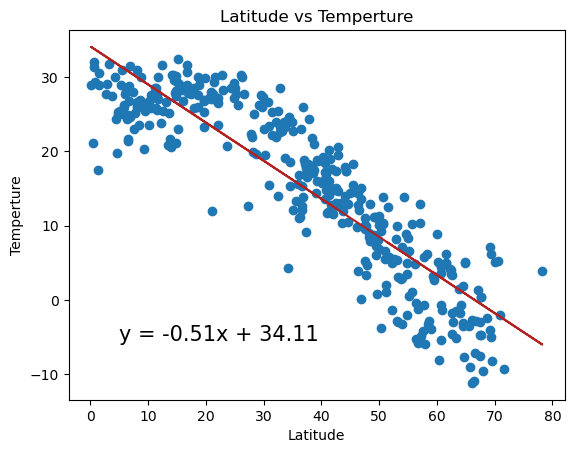

In [100]:
# Linear regression on Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"] 
northern_temp = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_temp)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_temp)
plt.plot(northern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq, (5, -5.5), fontsize=15, color="k")
plt.title("Latitude vs Temperature")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.5476569306400607


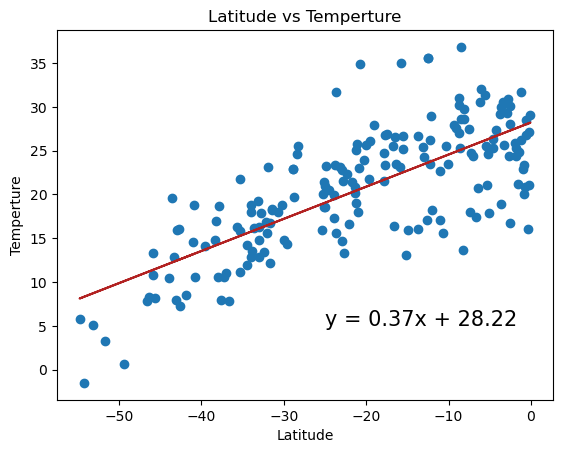

In [105]:
# Linear regression on Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"] 
southern_temp = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_temp)

regress_values = southern_x_value * slope + intercept

line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_temp)
plt.plot(southern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq2, (-25, 5), fontsize=15, color="k")
plt.title("Latitude vs Temperature")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**

In [ ]:
# Temperature for the northern hemisphere produces a negative linear relationship, the line dropping as it moves 
# across the graph to the right. The southern hemisphere is the opposite, producing a positive linear relationship.
# The temperature relationships in the scatterplot charts are tightly grouped, especially the northern hemisphere.
# However, there was more scattering of values found in the southern hemisphere.

# The especially strong r^2 value of 0.797 for the northern hemisphere is strong evidence to support the regression modelling.
# r^2 of 0.548 for the southern hemisphere is also good but gives away the more varied data displayed on the scatter plot.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0002793164126076251


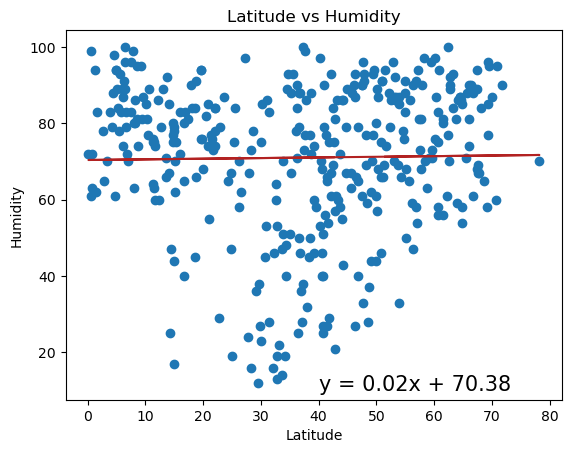

In [107]:
# Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"] 
northern_humidity = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_humidity)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_humidity)
plt.plot(northern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (40, 10), fontsize=15, color="k")
plt.title("Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.004768959572689411


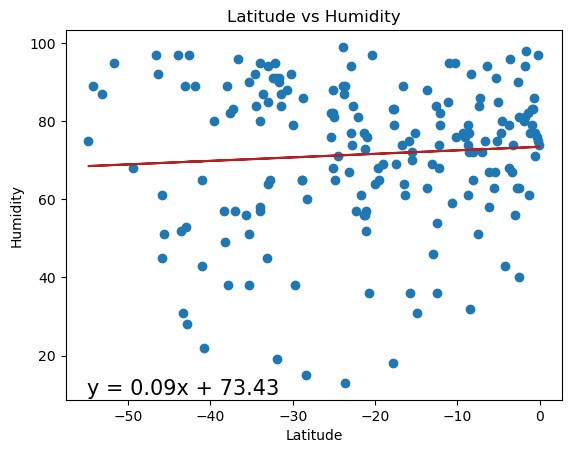

In [109]:
# Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"] 
southern_humidty = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_humidty)

regress_values = southern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_humidty)
plt.plot(southern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-55, 10), fontsize=15, color="k")
plt.title("Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**

In [ ]:
# Humidity is flat for northern hemisphere while very slightly positive for the southern hemisphere. 
# These values were expected before plotting the regression line with the scatterplot values being spaced 
# so erratically across the graph. 
# The majority of humidity readings for both hemispheres were over 50.

# The r^2 values of 0.0003 and 0.005 reinforce the randomness of the scatter plot and indicate there is 
# little knowledge to be confidently pull from this data.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.009157577074104306


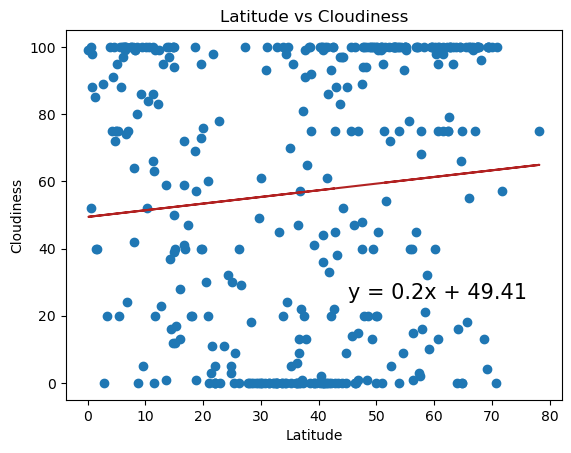

In [111]:
# Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"] 
northern_cloudiness = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_cloudiness)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_cloudiness)
plt.plot(northern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (45, 25), fontsize=15, color="k")
plt.title("Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.02590778626767885


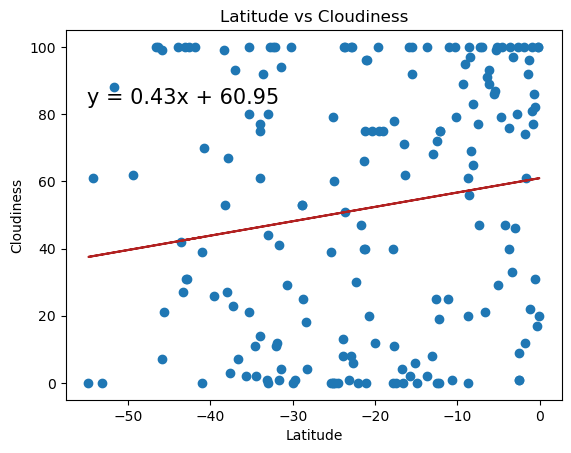

In [113]:
# Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"] 
southern_cloudiness = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_cloudiness)

regress_values = southern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_cloudiness)
plt.plot(southern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-55, 83), fontsize=15, color="k")
plt.title("Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**

In [ ]:
# Cloudiness values were slightly positive for both northern and southern hemispheres, a bit more pronounced for 
# the southern hemisphere. The regression line starting at approximately 40 for both meant the regression line wouldn't 
# have a dramatic slope in either direction.
# Cloudiness is shown to increase as the latitude value increases but is overall fairly consistent.
# A lot of readings were along the 0 or 100 line, especially for the northern hemisphere.

# The r^2 values of 0.009 and 0.026 reinfroce the randomness and varied values of cloud coverage we can see on the scatter plot.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.02981999938037419


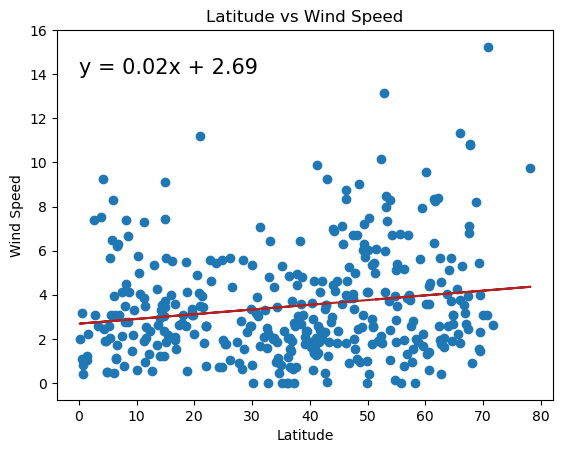

In [114]:
# Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"] 
northern_wind_speed = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_wind_speed)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_wind_speed)
plt.plot(northern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0, 14), fontsize=15, color="k")
plt.title("Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.051381724125135406


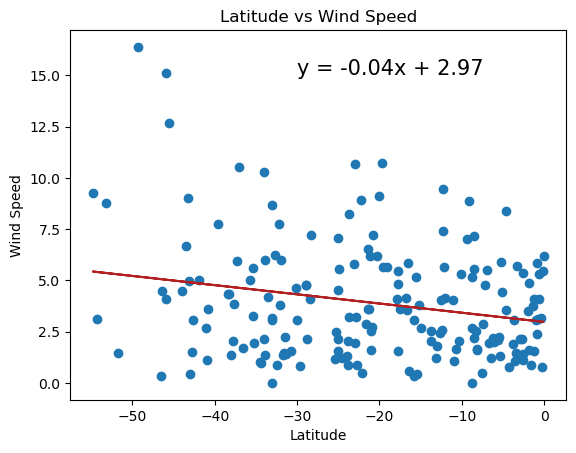

In [115]:
# Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"] 
southern_wind_speed = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_wind_speed)

regress_values = southern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_wind_speed)
plt.plot(southern_x_value, regress_values, color="firebrick")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-30, 15), fontsize=15, color="k")
plt.title("Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Windspeed provided a positive linear relationship for the northern hemisphere and negative for the southern. 
# The relationships came out as expected, with the line only slightly raising/dropping due to the majority of
# the values being tightly concentrated together.
# One oddity to note was southern hemisphere readings becoming more tightly concentrated as the latitude reading 
# appraoched the equator.

# r^2 values of 0.029 and 0.0513 are not as strong as the temperature values or indicate this model is over any use, 
# but values were still better than humidity and cloudiness.